## HW8

In [4]:
%matplotlib notebook

<IPython.core.display.Javascript object>


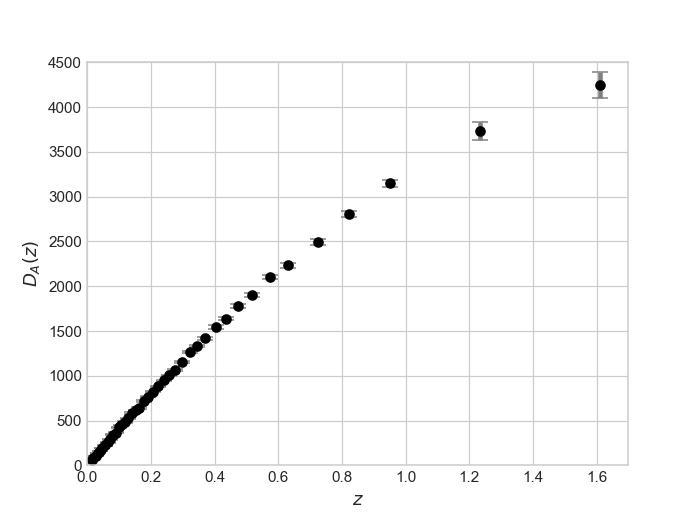

In [6]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np
import pandas as pd

# Read supernova data from file
SourceFile = '/home/keerthi/Downloads/supernova_data.txt'
data = pd.read_csv(SourceFile, sep='\s+')

# Extract the required Variables
m = data['mb']
m_err = data['dmb']
z = data['zcmb']
M = -19.3

D_L = np.power(10, (m - M - 25) / 5)
D_A = D_L / (1 + z)
D_A_err = np.log(10) / 5 * D_A * m_err


# Plot the data and label axes
plt.figure()
plt.errorbar(z, D_A, D_A_err, fmt='o', color='black',ecolor='gray', elinewidth=3, capsize=5)
plt.xlabel('$z$', fontsize='large')
plt.ylabel('$D_A(z)$', fontsize='large')
plt.xlim([0,1.7])
plt.ylim([0,4500])
plt.show()

## HW9

<IPython.core.display.Javascript object>


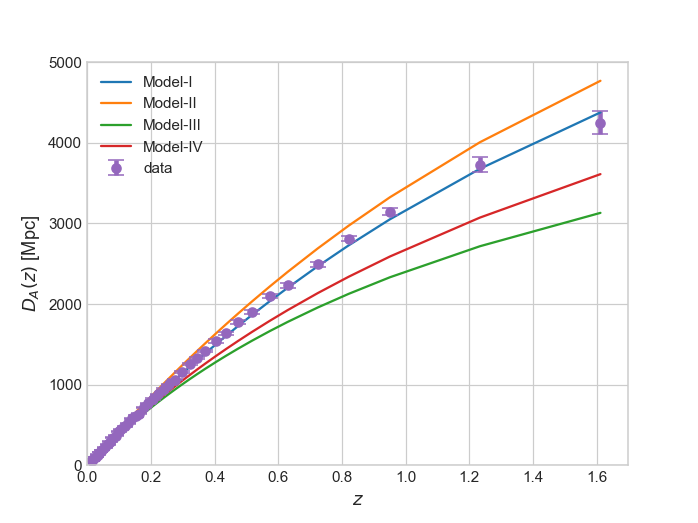

In [22]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import integrate
from scipy import constants
## Read supernova data from file
data = pd.read_csv(SourceFile, sep='\s+')

## Initialize the variables 
m = data['mb']
m_err = data['dmb']
z = data['zcmb']
M = -19.3
c = constants.c

D_L = np.power(10, (m - M - 25) / 5)
D_A = D_L / (1 + z)
D_A_err = np.log(10) / 5 * D_A * m_err

## Define the Integrand function
def integrand(z, H_0, Omega_m, Omega_l, Omega_k):
    return 1 / (H_0 * np.sqrt(Omega_m * (1 + z)**3 + Omega_k * (1 + z)**2 + Omega_l))

def calc_model_distance(z, H_0, Omega_m, Omega_l, Omega_k):
    D =  3.24078e-23 *c * integrate.quad(integrand, 0, z, args=(3.2408e-20*H_0, Omega_m, Omega_l, Omega_k))[0]
    return D 


H_0 = [73, 67, 73, 73]
Omega_m = [0.3, 0.3, 1, 0.3]
Omega_l = [0.7, 0.7, 0, 0]
Omega_k = [0, 0, 0, 0.7]

labels = ['Model-I', 'Model-II', 'Model-III', 'Model-IV']

plt.figure()

D_A_model = []
for i in range(4):
    ## Calculate the model distance for all redshift values. The pythonic way do that is the following: 
    ## a = range(3) --> a = [0,1,2]
    ## b = [i**2 for i in a] --> b =[0,1,4]
    ## Writing this way saves you a lot of lines of code!
    
    model_distance = [calc_model_distance(j, H_0[i], Omega_m[i], Omega_l[i], Omega_k[i]) for j in z]
    D_A_model.append(model_distance)
    
    ## plot for each model
    plt.plot(z, model_distance, label = labels[i])
    
plt.errorbar(z, D_A, yerr=D_A_err, fmt='o', label='data', elinewidth=3, capsize=5)

#Label the plots
plt.xlabel('$z$', fontsize='large')
plt.ylabel('$D_A(z)$ [Mpc]', fontsize='large')
#Limit the plot ranges
plt.xlim([0,1.7])
plt.ylim([0,5000])
plt.legend()
plt.show()

<IPython.core.display.Javascript object>


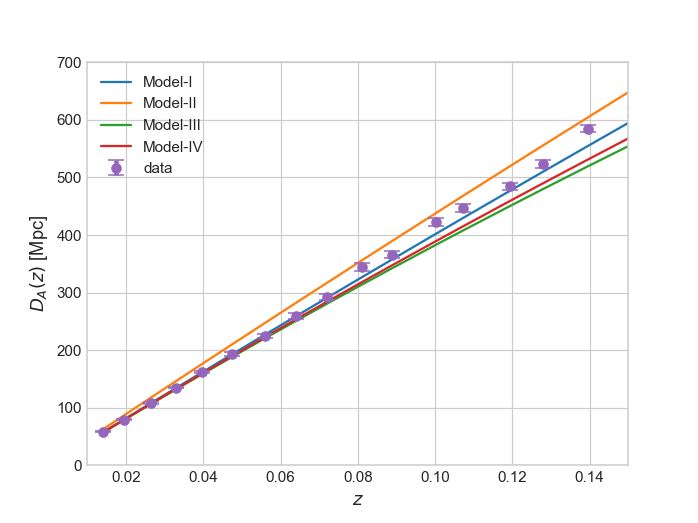

In [24]:
for i in range(4):
    model_distance = [calc_model_distance(j, H_0[i], Omega_m[i], Omega_l[i], Omega_k[i]) for j in z]
    D_A_model.append(model_distance)
    plt.plot(z, model_distance, label = labels[i]) 
plt.errorbar(z, D_A, yerr=D_A_err, fmt='o', label='data', elinewidth=3, capsize=5)
plt.xlabel('$z$', fontsize='large')
plt.ylabel('$D_A(z)$ [Mpc]', fontsize='large')
plt.xlim([0.01,0.15])
plt.ylim([0,700])
plt.legend()
plt.show()

In [21]:
## Calculating chisquare
def cal_chisquare(a,b):
    return(sum((a-b)**2/b))

m_obs = np.array(D_A)
m1 = D_A_model[0]
m2 = D_A_model[1]
m3 = D_A_model[2]
m4 = D_A_model[3]

print("Chi-squared for Model-1: ", cal_chisquare(m_obs,m1))
print("Chi-squared for Model-2: ", cal_chisquare(m_obs,m2))
print("Chi-squared for Model-3: ", cal_chisquare(m_obs,m3))
print("Chi-squared for Model-4: ", cal_chisquare(m_obs,m4))

Chi-squared for Model-1:  27.581406874624854
Chi-squared for Model-2:  230.03799666185515
Chi-squared for Model-3:  2181.171350517083
Chi-squared for Model-4:  885.1976059590725
